In [36]:
library(DESeq2)
library(RColorBrewer)

In [37]:
library(reshape2)


In [38]:
library("gplots")


In [39]:
library(readxl)
library(tidyverse)

In [40]:
library("pheatmap")
library("RColorBrewer")

In [41]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)

In [90]:
HCOLOR = '#E26A2C'
HCOLOR_light = '#FDA65D'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'
PRO_COLOR = 'MediumSeaGreen'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

tpal = brewer.pal(5, "Purples")
gpal = brewer.pal(4, 'Dark2')
ann_colors = list(
    Timepoint = c('1'=tpal[1], '2'=tpal[2], '3'=tpal[3], 
                  '4'=tpal[4], '5'=tpal[5]),
    Group = c(A =HCOLOR_light, C = HCOLOR)
)


In [43]:
list.files()

[1] "CC1A3 RNASEQ 1A3 DESeq ref vs longterm.ipynb" 
 [2] "CC1A3 RNASEQ 1A3 DESeq.ipynb"                 
 [3] "CC1A3 RNASEQ 1A3 DESeq_longterm2.ipynb"       
 [4] "CC1A3 RNASEQ MED4 correlation.ipynb"          
 [5] "CC1A3 RNASEQ MED4 DESeq ref vs longterm.ipynb"
 [6] "CC1A3 RNASEQ MED4 DESeq.ipynb"                
 [7] "CC1A3 RNASEQ MED4 DESeq_longterm2.ipynb"      
 [8] "CC1A3 WGCNA CC.ipynb"                         
 [9] "data"                                         
[10] "DE_results"                                   
[11] "figures"

In [44]:
fname_counts = file.path('data', 'MED4_counts_combined.txt')

In [45]:
cdf = read.csv(fname_counts, sep='\t' )

In [46]:
rownames(cdf) = cdf$gene_id

In [47]:
md = read_excel(file.path('data','CC1A3_RNASEQ_metadata.xlsx'))

In [48]:
names(md)

[1] "sample_id"               "TGCnew#"                
 [3] "sample"                  "Conc.Qubit TGC [ng/ul]" 
 [5] "starting input RNA (ng)" "Lib_conc [ng/ul]"       
 [7] "Group"                   "Timepoint"              
 [9] "Replicate"               "Day"                    
[11] "extraction"              "techincal_replicate"

In [49]:
md = md %>% rename('init_RNA' = 'starting input RNA (ng)')

In [50]:
md = md %>% mutate(phase = factor(recode(Timepoint, 
                                  '1' = 'logExp', 
                                  '2' = 'decline' , 
                                  '3' = 'longterm' ,
                                  '4' = 'longterm' ,
                                  '5' = 'longterm' ,
                                         .default = 'NA'
                                 ), levels=c('logExp', 'decline', 'longterm', 'NA')))

In [51]:
group <- paste0(md$Group, md$Timepoint)
group
md$groupandtime = group

[1] "A1"       "A1"       "A1"       "A2"       "A2"       "A2"      
 [7] "A3"       "A3"       "A3"       "C1"       "C1"       "C1"      
[13] "C2"       "C2"       "C2"       "C2"       "C2"       "C3"      
[19] "C3"       "C3"       "C3"       "C3"       "C4"       "C4"      
[25] "C4"       "C5"       "C5"       "C5"       "MockMock" "P1"      
[31] "P1"       "P1"       "P2"       "P2"       "P2"

In [52]:
md = md %>% mutate(treatment = factor(recode(groupandtime, 
                                  'A1' = 'A1', 
                                  'A2' = 'A2', 
                                  'A3' = 'A3', 
                                  'C1' = 'C1' , 
                                  'C2' = 'C2' , 
                                  'C3' = 'C3' ,
                                  'C4' = 'longterm' ,
                                  'C5' = 'longterm' ,
                                         .default = 'NA'
                                 ), levels=c('A1', 'A2', 'A3', 'C1', 'C2', 'C3', 'longterm', 'NA')))

In [53]:
table(md$treatment)


      A1       A2       A3       C1       C2       C3 longterm       NA 
       3        3        3        3        5        5        6        7 

In [54]:
head(md)

sample_id,TGCnew#,sample,Conc.Qubit TGC [ng/ul],init_RNA,Lib_conc [ng/ul],Group,Timepoint,Replicate,Day,extraction,techincal_replicate,phase,groupandtime,treatment
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<fct>
A1A_S7,7,A1A,168.0,100,0.888,A,1,A,11,1,0,logExp,A1,A1
A1B_S8,8,A1B,99.8,100,0.850,A,1,B,11,1,0,logExp,A1,A1
A1C_S9,9,A1C,57.3,100,1.570,A,1,C,11,1,0,logExp,A1,A1
A2A_S10,10,A2A,69.0,100,0.592,A,2,A,18,2,0,decline,A2,A2
A2B_S11,11,A2B,41.9,100,0.570,A,2,B,18,2,0,decline,A2,A2
A2C_S12,12,A2C,67.2,100,0.980,A,2,C,18,4,0,decline,A2,A2


In [55]:
md$Group = factor(md$Group, levels = c('P', 'C', 'A', 'Mock'))


In [56]:
head(cdf)

,gene_id,gene,product,protein_id,old_locus_tag,A1A_S7,A1B_S8,A1C_S9,A2A_S10,A2B_S11,⋯,C5A_S32,C5B_S33,C5C_S34,Mock_S35,P6A_S1,P6B_S2,P6C_S3,P7A_S4,P7B_S5,P7C_S6
,<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
TX50_RS00020,TX50_RS00020,dnaN,DNA polymerase III subunit beta,WP_011131639.1,NA,0,0,0,1,0,⋯,1303,591,765,0,3076,3135,2995,2956,4869,4302
TX50_RS00025,TX50_RS00025,,hypothetical protein,WP_011131640.1,NA,2,2,0,0,0,⋯,85,23,66,2,427,310,491,111,198,191
TX50_RS00030,TX50_RS00030,purL,phosphoribosylformylglycinamidine synthase subunit PurL,WP_011131641.1,NA,0,4,3,3,3,⋯,513,328,518,0,1162,1365,1266,1878,3482,3459
TX50_RS00035,TX50_RS00035,purF,amidophosphoribosyltransferase,WP_011131642.1,NA,0,1,1,0,0,⋯,238,115,209,0,914,1196,1035,516,1070,1166
TX50_RS00040,TX50_RS00040,,DNA topoisomerase 4 subunit A,WP_011131643.1,NA,0,8,0,2,5,⋯,491,218,354,0,1761,2014,1799,1399,1297,1216
TX50_RS00045,TX50_RS00045,,tetratricopeptide repeat protein,WP_011131644.1,NA,0,0,0,0,0,⋯,80,33,55,0,273,200,305,250,517,345


In [57]:
counts = cdf[,-c(1,2,3,4,5)]
genes = cdf[,c(1,2,3,4,5)]

In [58]:
head(md)
head(counts)
head(genes)

sample_id,TGCnew#,sample,Conc.Qubit TGC [ng/ul],init_RNA,Lib_conc [ng/ul],Group,Timepoint,Replicate,Day,extraction,techincal_replicate,phase,groupandtime,treatment
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<fct>
A1A_S7,7,A1A,168.0,100,0.888,A,1,A,11,1,0,logExp,A1,A1
A1B_S8,8,A1B,99.8,100,0.850,A,1,B,11,1,0,logExp,A1,A1
A1C_S9,9,A1C,57.3,100,1.570,A,1,C,11,1,0,logExp,A1,A1
A2A_S10,10,A2A,69.0,100,0.592,A,2,A,18,2,0,decline,A2,A2
A2B_S11,11,A2B,41.9,100,0.570,A,2,B,18,2,0,decline,A2,A2
A2C_S12,12,A2C,67.2,100,0.980,A,2,C,18,4,0,decline,A2,A2


,A1A_S7,A1B_S8,A1C_S9,A2A_S10,A2B_S11,A2C_S12,A3A_S13,A3B_S14,A3C_S15,C1A_S16,⋯,C5A_S32,C5B_S33,C5C_S34,Mock_S35,P6A_S1,P6B_S2,P6C_S3,P7A_S4,P7B_S5,P7C_S6
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
TX50_RS00020,0,0,0,1,0,4,0,0,0,1119,⋯,1303,591,765,0,3076,3135,2995,2956,4869,4302
TX50_RS00025,2,2,0,0,0,0,0,0,0,127,⋯,85,23,66,2,427,310,491,111,198,191
TX50_RS00030,0,4,3,3,3,4,2,0,5,359,⋯,513,328,518,0,1162,1365,1266,1878,3482,3459
TX50_RS00035,0,1,1,0,0,4,0,0,0,326,⋯,238,115,209,0,914,1196,1035,516,1070,1166
TX50_RS00040,0,8,0,2,5,0,4,7,0,600,⋯,491,218,354,0,1761,2014,1799,1399,1297,1216
TX50_RS00045,0,0,0,0,0,3,1,0,0,113,⋯,80,33,55,0,273,200,305,250,517,345


,gene_id,gene,product,protein_id,old_locus_tag
,<chr>,<chr>,<chr>,<chr>,<lgl>
TX50_RS00020,TX50_RS00020,dnaN,DNA polymerase III subunit beta,WP_011131639.1,NA
TX50_RS00025,TX50_RS00025,,hypothetical protein,WP_011131640.1,NA
TX50_RS00030,TX50_RS00030,purL,phosphoribosylformylglycinamidine synthase subunit PurL,WP_011131641.1,NA
TX50_RS00035,TX50_RS00035,purF,amidophosphoribosyltransferase,WP_011131642.1,NA
TX50_RS00040,TX50_RS00040,,DNA topoisomerase 4 subunit A,WP_011131643.1,NA
TX50_RS00045,TX50_RS00045,,tetratricopeptide repeat protein,WP_011131644.1,NA


In [59]:
table(md$sample_id == names(counts))


TRUE 
  35 

# Remove the 60ng technical replicate and non P ,C samples

In [60]:
counts = cdf[,-c(1,2,3,4,5)]
genes = cdf[,c(1,2,3,4,5)]

In [61]:
# remove last 5 lines that are not genes
counts = head(counts, -5)
genes = head(genes, -5)

In [62]:
md_noalt = filter(md, Group %in% c('A', 'C'), techincal_replicate %in% 0)


In [63]:
counts_no_alt = select(counts, md_noalt$sample_id)

In [64]:
table(md_noalt$sample_id == names(counts_no_alt))


TRUE 
  24 

In [65]:
cts = counts_no_alt
coldata= md_noalt


In [66]:
head(coldata)

sample_id,TGCnew#,sample,Conc.Qubit TGC [ng/ul],init_RNA,Lib_conc [ng/ul],Group,Timepoint,Replicate,Day,extraction,techincal_replicate,phase,groupandtime,treatment
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<fct>
A1A_S7,7,A1A,168.0,100,0.888,A,1,A,11,1,0,logExp,A1,A1
A1B_S8,8,A1B,99.8,100,0.850,A,1,B,11,1,0,logExp,A1,A1
A1C_S9,9,A1C,57.3,100,1.570,A,1,C,11,1,0,logExp,A1,A1
A2A_S10,10,A2A,69.0,100,0.592,A,2,A,18,2,0,decline,A2,A2
A2B_S11,11,A2B,41.9,100,0.570,A,2,B,18,2,0,decline,A2,A2
A2C_S12,12,A2C,67.2,100,0.980,A,2,C,18,4,0,decline,A2,A2


In [67]:
head(cts)

,A1A_S7,A1B_S8,A1C_S9,A2A_S10,A2B_S11,A2C_S12,A3A_S13,A3B_S14,A3C_S15,C1A_S16,⋯,C2C_100ng_S22,C3A_100ng_S24,C3B_60ng_S26,C3C_100ng_S27,C4A_S29,C4B_S30,C4C_S31,C5A_S32,C5B_S33,C5C_S34
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
TX50_RS00020,0,0,0,1,0,4,0,0,0,1119,⋯,3769,355,2220,1046,1384,989,1526,1303,591,765
TX50_RS00025,2,2,0,0,0,0,0,0,0,127,⋯,268,26,106,29,86,56,93,85,23,66
TX50_RS00030,0,4,3,3,3,4,2,0,5,359,⋯,1061,239,961,471,671,500,1169,513,328,518
TX50_RS00035,0,1,1,0,0,4,0,0,0,326,⋯,692,102,492,150,328,289,404,238,115,209
TX50_RS00040,0,8,0,2,5,0,4,7,0,600,⋯,1833,182,745,313,621,489,689,491,218,354
TX50_RS00045,0,0,0,0,0,3,1,0,0,113,⋯,249,17,221,69,134,97,79,80,33,55


In [68]:
coldata$groupandtime = factor(coldata$groupandtime, levels=c("C1", "A2","A1", 'A3',"C2", "C3", "C4", "C5"))
coldata$treatment = factor(coldata$treatment, levels=c('A1', 'A2', 'A3','C1', 'C2', 'C3', 'longterm'))


coldata$Group = factor(coldata$Group, levels=c("A", "C"))
coldata$Timepoint = factor(coldata$Timepoint, levels=c(1,2,3,4,5))
coldata$extraction = factor(coldata$extraction)


In [69]:
colnames(cts) = coldata$sample
rownames(coldata) = coldata$sample


Warning message:
"Setting row names on a tibble is deprecated."


In [70]:
dput(unique(coldata$groupandtime))
dput(unique(coldata$Group))

structure(c(3L, 2L, 4L, 1L, 5L, 6L, 7L, 8L), levels = c("C1", 
"A2", "A1", "A3", "C2", "C3", "C4", "C5"), class = "factor")
structure(1:2, levels = c("A", "C"), class = "factor")


In [71]:
rownames(coldata) = coldata$sample



Warning message:
"Setting row names on a tibble is deprecated."


In [72]:
rownames(coldata)

[1] "A1A"   "A1B"   "A1C"   "A2A"   "A2B"   "A2C"   "A3A"   "A3B"   "A3C"  
[10] "C1A"   "C1B"   "C1C"   "C2A"   "C2B_1" "C2C_1" "C3A_1" "C3B"   "C3C_1"
[19] "C4A"   "C4B"   "C4C"   "C5A"   "C5B"   "C5C"

In [73]:
all(rownames(coldata) == colnames(cts))

[1] TRUE

In [74]:
design = model.matrix(~ 0+ extraction + treatment, data = coldata)

In [75]:
design

,extraction1,extraction2,extraction3,extraction4,extraction5,extraction6,extraction7,treatmentA2,treatmentA3,treatmentC1,treatmentC2,treatmentC3,treatmentlongterm
A1A,1,0,0,0,0,0,0,0,0,0,0,0,0
A1B,1,0,0,0,0,0,0,0,0,0,0,0,0
A1C,1,0,0,0,0,0,0,0,0,0,0,0,0
A2A,0,1,0,0,0,0,0,1,0,0,0,0,0
A2B,0,1,0,0,0,0,0,1,0,0,0,0,0
A2C,0,0,0,1,0,0,0,1,0,0,0,0,0
A3A,0,0,0,1,0,0,0,0,1,0,0,0,0
A3B,0,0,1,0,0,0,0,0,1,0,0,0,0
A3C,0,0,0,0,1,0,0,0,1,0,0,0,0
C1A,1,0,0,0,0,0,0,0,0,1,0,0,0


In [76]:
design = subset(design, select=-c(extraction7))

In [77]:
dds <- DESeqDataSetFromMatrix(countData = cts,
                              colData = coldata,
                              design= ~treatment)

In [78]:
mcols(dds) <- DataFrame(mcols(dds), genes)
mcols(dds)

DataFrame with 1865 rows and 5 columns
                  gene_id        gene                product     protein_id
              <character> <character>            <character>    <character>
TX50_RS00020 TX50_RS00020        dnaN DNA polymerase III s.. WP_011131639.1
TX50_RS00025 TX50_RS00025               hypothetical protein WP_011131640.1
TX50_RS00030 TX50_RS00030        purL phosphoribosylformyl.. WP_011131641.1
TX50_RS00035 TX50_RS00035        purF amidophosphoribosylt.. WP_011131642.1
TX50_RS00040 TX50_RS00040             DNA topoisomerase 4 .. WP_011131643.1
...                   ...         ...                    ...            ...
TX50_RS09870 TX50_RS09870               hypothetical protein WP_225866747.1
TX50_RS09875 TX50_RS09875               hypothetical protein WP_225866749.1
TX50_RS09880 TX50_RS09880             SxtJ family membrane.. WP_011132879.1
TX50_RS09885 TX50_RS09885             DUF5989 family protein WP_225866752.1
TX50_RS09890 TX50_RS09890               hypotheti

In [79]:
dds

class: DESeqDataSet 
dim: 1865 24 
metadata(1): version
assays(1): counts
rownames(1865): TX50_RS00020 TX50_RS00025 ... TX50_RS09885 TX50_RS09890
rowData names(5): gene_id gene product protein_id old_locus_tag
colnames(24): A1A A1B ... C5B C5C
colData names(15): sample_id TGCnew# ... groupandtime treatment

In [80]:
keep <- rowSums(counts(dds)) >= 10
table(keep)
dds <- dds[keep,]

keep
FALSE  TRUE 
   10  1855 

In [81]:
names(colData(dds))

[1] "sample_id"              "TGCnew#"                "sample"                
 [4] "Conc.Qubit TGC [ng/ul]" "init_RNA"               "Lib_conc [ng/ul]"      
 [7] "Group"                  "Timepoint"              "Replicate"             
[10] "Day"                    "extraction"             "techincal_replicate"   
[13] "phase"                  "groupandtime"           "treatment"

In [82]:
dds$groupandtime = factor(dds$groupandtime, levels=c("C1", "A1","A2", "A3", "C2", "C3", "C4", "C5"))
dds$treatment = factor(dds$treatment, levels=c('A1', 'A2', 'A3','C1', 'C2', 'C3', 'longterm'))

dds$Group = factor(dds$Group, levels=c("A", "C"))
dds$Timepoint = factor(dds$Timepoint, levels=c(1,2,3,4,5))
dds$extraction = factor(dds$extraction)


In [83]:
table(dds$treatment)
table(coldata$treatment)


      A1       A2       A3       C1       C2       C3 longterm 
       3        3        3        3        3        3        6 


      A1       A2       A3       C1       C2       C3 longterm 
       3        3        3        3        3        3        6 

In [84]:
vsd <- vst(dds, blind = FALSE)
head(assay(vsd), 3)

,A1A,A1B,A1C,A2A,A2B,A2C,A3A,A3B,A3C,C1A,⋯,C2C_1,C3A_1,C3B,C3C_1,C4A,C4B,C4C,C5A,C5B,C5C
TX50_RS00020,0.3562145,0.3562145,0.3562145,7.4603408,0.3562145,5.5871625,0.3562145,0.3562145,0.3562145,5.575670,⋯,6.202432,4.254558,6.705863,5.766273,6.248485,6.279189,8.182468,5.781093,5.415953,5.320125
TX50_RS00025,9.2607702,9.8761840,0.3562145,0.3562145,0.3562145,0.3562145,0.3562145,0.3562145,0.3562145,2.900483,⋯,2.886433,1.712298,2.847070,1.821922,2.784273,2.714651,4.323922,2.509577,1.878921,2.457083
TX50_RS00030,0.3562145,10.8742196,10.6662690,9.0313218,7.6779304,5.5871625,10.5148058,0.3562145,11.4848506,4.083532,⋯,4.492062,3.768137,5.542657,4.692967,5.253516,5.339862,7.801845,4.532503,4.631636,4.799433


In [85]:
head(colData(vsd))

DataFrame with 6 rows and 16 columns
      sample_id   TGCnew#      sample Conc.Qubit TGC [ng/ul]  init_RNA
    <character> <numeric> <character>              <numeric> <numeric>
A1A      A1A_S7         7         A1A                  168.0       100
A1B      A1B_S8         8         A1B                   99.8       100
A1C      A1C_S9         9         A1C                   57.3       100
A2A     A2A_S10        10         A2A                   69.0       100
A2B     A2B_S11        11         A2B                   41.9       100
A2C     A2C_S12        12         A2C                   67.2       100
    Lib_conc [ng/ul]    Group Timepoint   Replicate         Day extraction
           <numeric> <factor>  <factor> <character> <character>   <factor>
A1A            0.888        A         1           A          11          1
A1B            0.850        A         1           B          11          1
A1C            1.570        A         1           C          11          1
A2A            0.592

In [86]:
rld <- rlog(dds, blind = FALSE)
head(assay(rld), 3)

Warning message in sparseTest(counts(object, normalized = TRUE), 0.9, 100, 0.1):
"the rlog assumes that data is close to a negative binomial distribution, an assumption
which is sometimes not compatible with datasets where many genes have many zero counts
despite a few very large counts.
In this data, for 12% of genes with a sum of normalized counts above 100, it was the case 
that a single sample's normalized count made up more than 90% of the sum over all samples.
the threshold for this warning is 10% of genes. See plotSparsity(dds) for a visualization of this.
We recommend instead using the varianceStabilizingTransformation or shifted log (see vignette)."


,A1A,A1B,A1C,A2A,A2B,A2C,A3A,A3B,A3C,C1A,⋯,C2C_1,C3A_1,C3B,C3C_1,C4A,C4B,C4C,C5A,C5B,C5C
TX50_RS00020,5.833803,6.302912,6.460001,7.179679,4.177798,5.549222,6.789131,5.230959,6.522751,5.528617,⋯,6.132824,4.2036399,6.612423,5.7134250,6.176859,6.206192,7.999340,5.727747,5.372917,5.279019
TX50_RS00025,8.547464,9.090386,5.860149,4.613531,3.576228,1.625734,6.189527,4.630182,5.922947,2.439698,⋯,2.420971,0.5524066,2.369996,0.7701499,2.286923,2.193749,4.077808,1.905107,0.881136,1.829015
TX50_RS00030,5.874790,10.431875,10.201132,8.722842,7.495871,5.564920,9.985161,5.269942,11.016644,4.029571,⋯,4.456966,3.6887744,5.507816,4.6627731,5.223882,5.309054,7.665108,4.498753,4.600445,4.770635


In [87]:
sampleDists <- dist(t(assay(vsd)))
sampleDists

            A1A       A1B       A1C       A2A       A2B       A2C       A3A
A1B   228.72635                                                            
A1C   204.66715 224.62559                                                  
A2A   210.42212 224.27207 208.78796                                        
A2B   185.87863 219.63369 190.38000 189.74660                              
A2C   177.79504 203.36415 183.46315 181.48259 153.72654                    
A3A   222.63377 228.23563 218.19109 222.60681 201.19743 191.36279          
A3B   202.00700 223.06752 199.58284 208.11533 178.04847 171.72168 213.61391
A3C   222.34645 234.57094 222.90564 225.11538 203.95195 194.32063 226.30418
C1A   178.07249 193.77726 185.27471 171.34519 155.88461 117.20931 192.46846
C1B   179.14789 194.20058 186.94203 172.57810 158.33973 119.86384 193.66925
C1C   176.54378 192.13386 182.72420 171.85730 154.93769 119.21114 190.94331
C2A   162.98863 185.92093 168.40248 160.35414 135.31835  99.44275 178.60113
C2B_1 167.96

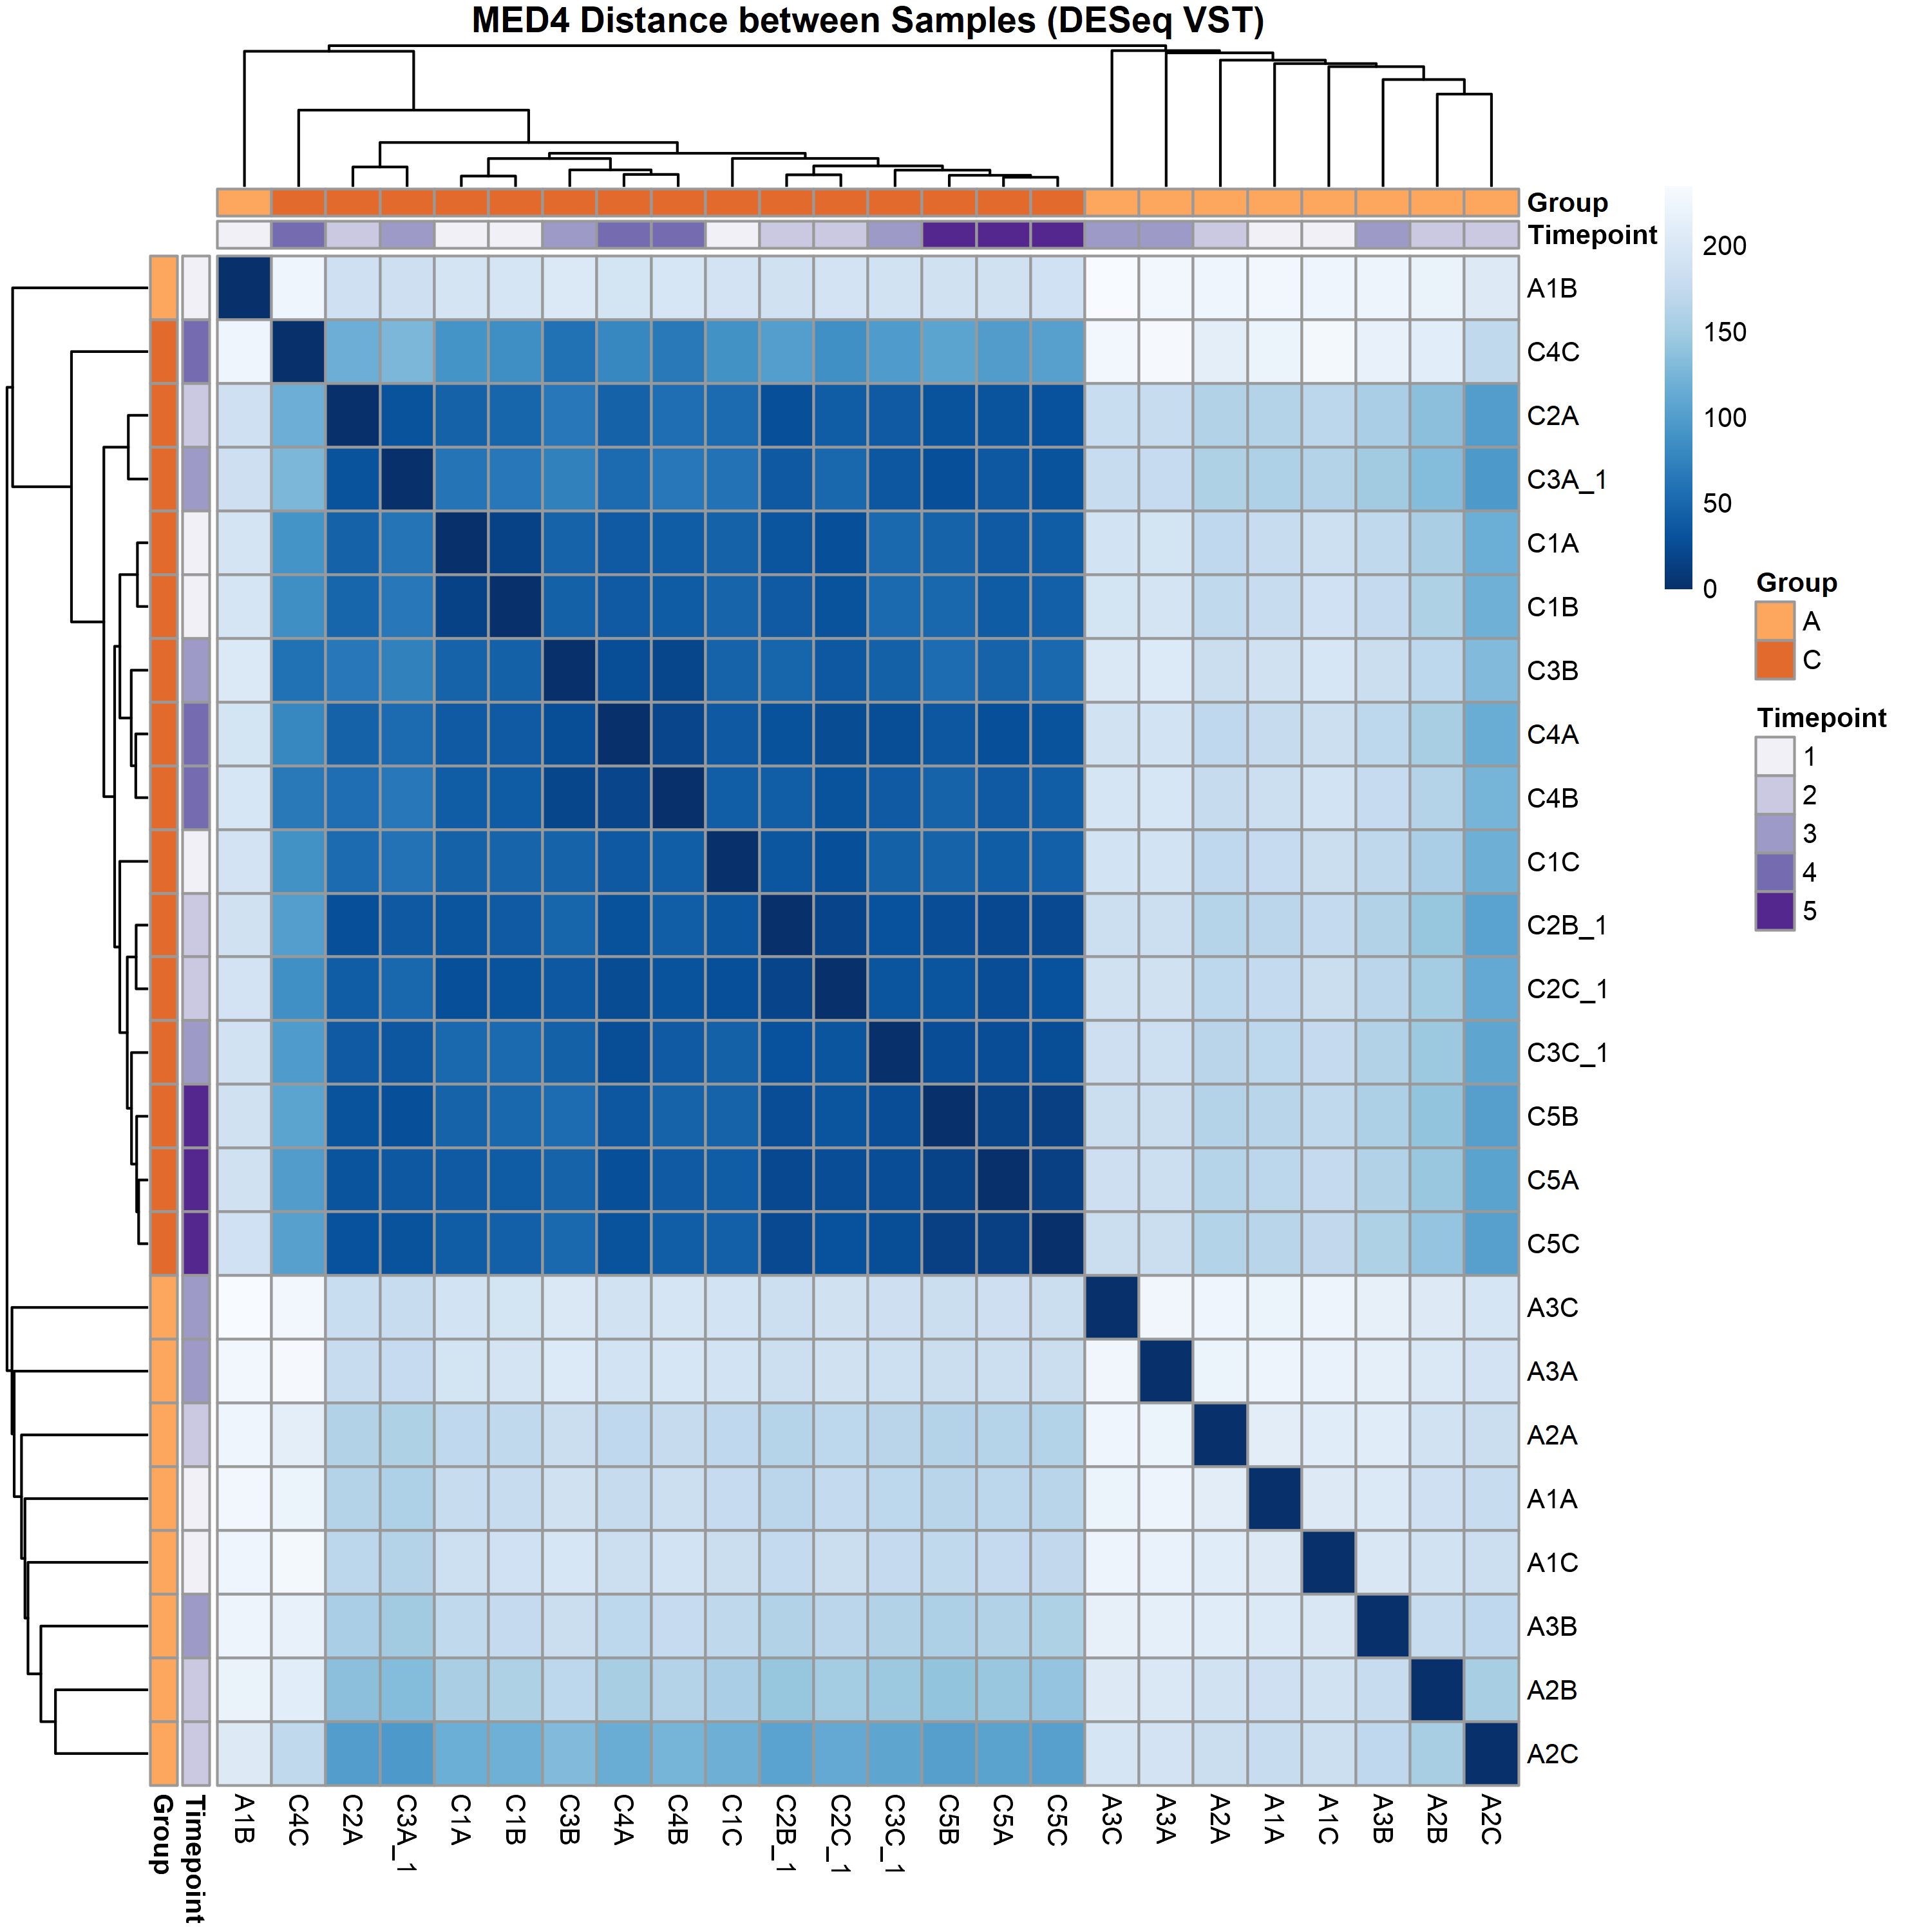

In [92]:
sampleDists <- dist(t(assay(vsd)))
#sampleDists
sampleDistMatrix <- as.matrix( sampleDists )
rownames(sampleDistMatrix) <- vsd$sample
colnames(sampleDistMatrix) <- vsd$sample
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
ann_df = colData(vsd)[c('Timepoint', 'Group')]

pheatmap(sampleDistMatrix,
         clustering_distance_rows = sampleDists,
         clustering_distance_cols = sampleDists,
         col = colors,
         annotation_row = ann_df,
         annotation_col = ann_df,
         annotation_colors = ann_colors,
         main = "MED4 Distance between Samples (DESeq VST)"
)

In [93]:
head(sampleDistMatrix)

,A1A,A1B,A1C,A2A,A2B,A2C,A3A,A3B,A3C,C1A,⋯,C2C_1,C3A_1,C3B,C3C_1,C4A,C4B,C4C,C5A,C5B,C5C
A1A,0.0000,228.7263,204.6671,210.4221,185.8786,177.7950,222.6338,202.0070,222.3464,178.0725,⋯,174.5576,159.16706,188.7396,169.7647,176.9252,183.7686,221.7637,168.4571,166.1221,166.1891
A1B,228.7263,0.0000,224.6256,224.2721,219.6337,203.3641,228.2356,223.0675,234.5709,193.7773,⋯,192.1892,184.68257,201.8864,190.1404,193.0843,197.1241,225.2304,188.2950,187.8351,187.0993
A1C,204.6671,224.6256,0.0000,208.7880,190.3800,183.4632,218.1911,199.5828,222.9056,185.2747,⋯,181.3723,163.52398,196.2720,174.9131,183.5123,190.5413,230.2987,175.1972,172.4247,173.0185
A2A,210.4221,224.2721,208.7880,0.0000,189.7466,181.4826,222.6068,208.1153,225.1154,171.3452,⋯,169.6906,158.69192,182.0027,166.6609,171.3441,176.6468,211.8484,164.5524,163.2120,162.7128
A2B,185.8786,219.6337,190.3800,189.7466,0.0000,153.7265,201.1974,178.0485,203.9520,155.8846,⋯,151.6637,131.99685,169.4940,145.6184,154.4477,163.0666,208.8201,144.4135,140.6257,141.4628
A2C,177.7950,203.3641,183.4632,181.4826,153.7265,0.0000,191.3628,171.7217,194.3206,117.2093,⋯,112.9642,96.18511,129.9548,107.7548,116.4920,124.6437,172.3436,106.5718,102.4517,103.7453


In [94]:
m = as.data.frame(sampleDistMatrix)
m$sample1 = rownames(m)
mdist = pivot_longer(m, cols=colnames(sampleDistMatrix), 
            names_to='sample2',
            values_to='dist')
mdist = mdist %>% filter(sample1 != sample2)

In [95]:
mdist = left_join(mdist, colData(dds), 
          by=c('sample1' = 'sample'), suffix=c('', '_1'), copy=TRUE)
mdist = left_join(mdist, colData(dds), 
          by=c('sample2' = 'sample'), suffix=c('', '_2'), copy=TRUE)
head(mdist)


sample1,sample2,dist,sample_id,TGCnew.,Conc.Qubit.TGC..ng.ul.,init_RNA,Lib_conc..ng.ul.,Group,Timepoint,⋯,Lib_conc..ng.ul._2,Group_2,Timepoint_2,Replicate_2,Day_2,extraction_2,techincal_replicate_2,phase_2,groupandtime_2,treatment_2
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,⋯,<dbl>,<fct>,<fct>,<chr>,<chr>,<fct>,<dbl>,<fct>,<fct>,<fct>
A1A,A1B,228.7263,A1A_S7,7,168,100,0.888,A,1,⋯,0.850,A,1,B,11,1,0,logExp,A1,A1
A1A,A1C,204.6671,A1A_S7,7,168,100,0.888,A,1,⋯,1.570,A,1,C,11,1,0,logExp,A1,A1
A1A,A2A,210.4221,A1A_S7,7,168,100,0.888,A,1,⋯,0.592,A,2,A,18,2,0,decline,A2,A2
A1A,A2B,185.8786,A1A_S7,7,168,100,0.888,A,1,⋯,0.570,A,2,B,18,2,0,decline,A2,A2
A1A,A2C,177.7950,A1A_S7,7,168,100,0.888,A,1,⋯,0.980,A,2,C,18,4,0,decline,A2,A2
A1A,A3A,222.6338,A1A_S7,7,168,100,0.888,A,1,⋯,1.100,A,3,A,31,4,0,longterm,A3,A3


In [96]:
dput(colnames(mdist))

c("sample1", "sample2", "dist", "sample_id", "TGCnew.", "Conc.Qubit.TGC..ng.ul.", 
"init_RNA", "Lib_conc..ng.ul.", "Group", "Timepoint", "Replicate", 
"Day", "extraction", "techincal_replicate", "phase", "groupandtime", 
"treatment", "sample_id_2", "TGCnew._2", "Conc.Qubit.TGC..ng.ul._2", 
"init_RNA_2", "Lib_conc..ng.ul._2", "Group_2", "Timepoint_2", 
"Replicate_2", "Day_2", "extraction_2", "techincal_replicate_2", 
"phase_2", "groupandtime_2", "treatment_2")


In [97]:
cgroup_levels = c("AA",  "CA", "CC")
cgroup_levels = c("Distance from A to A",  "Distance from C to A", 
                  "Distance from C to C")
ctime_levels = c(
    "11", 
    "21", '22', 
    '31', '32', "33", 
    '41', '42', "43", "44", 
    '51', '52', "53", "54", "55"
)
cself= c('11', '22', '33','44', '55')
mdist = mdist %>% 
   mutate(combgroup = paste('Distance from', Group, 'to', Group_2),
          combtime = paste0(Timepoint, Timepoint_2),
          self = combtime %in% cself
         ) %>%
   rename(Distance_to_timepoint = Timepoint_2 ) %>%
   filter(combgroup %in% cgroup_levels, combtime %in% ctime_levels)
  
dput(unique(mdist$combgroup))
dput(unique(mdist$combtime))

c("Distance from A to A", "Distance from C to A", "Distance from C to C"
)
c("11", "21", "22", "31", "32", "33", "41", "42", "43", "44", 
"51", "52", "53", "54", "55")


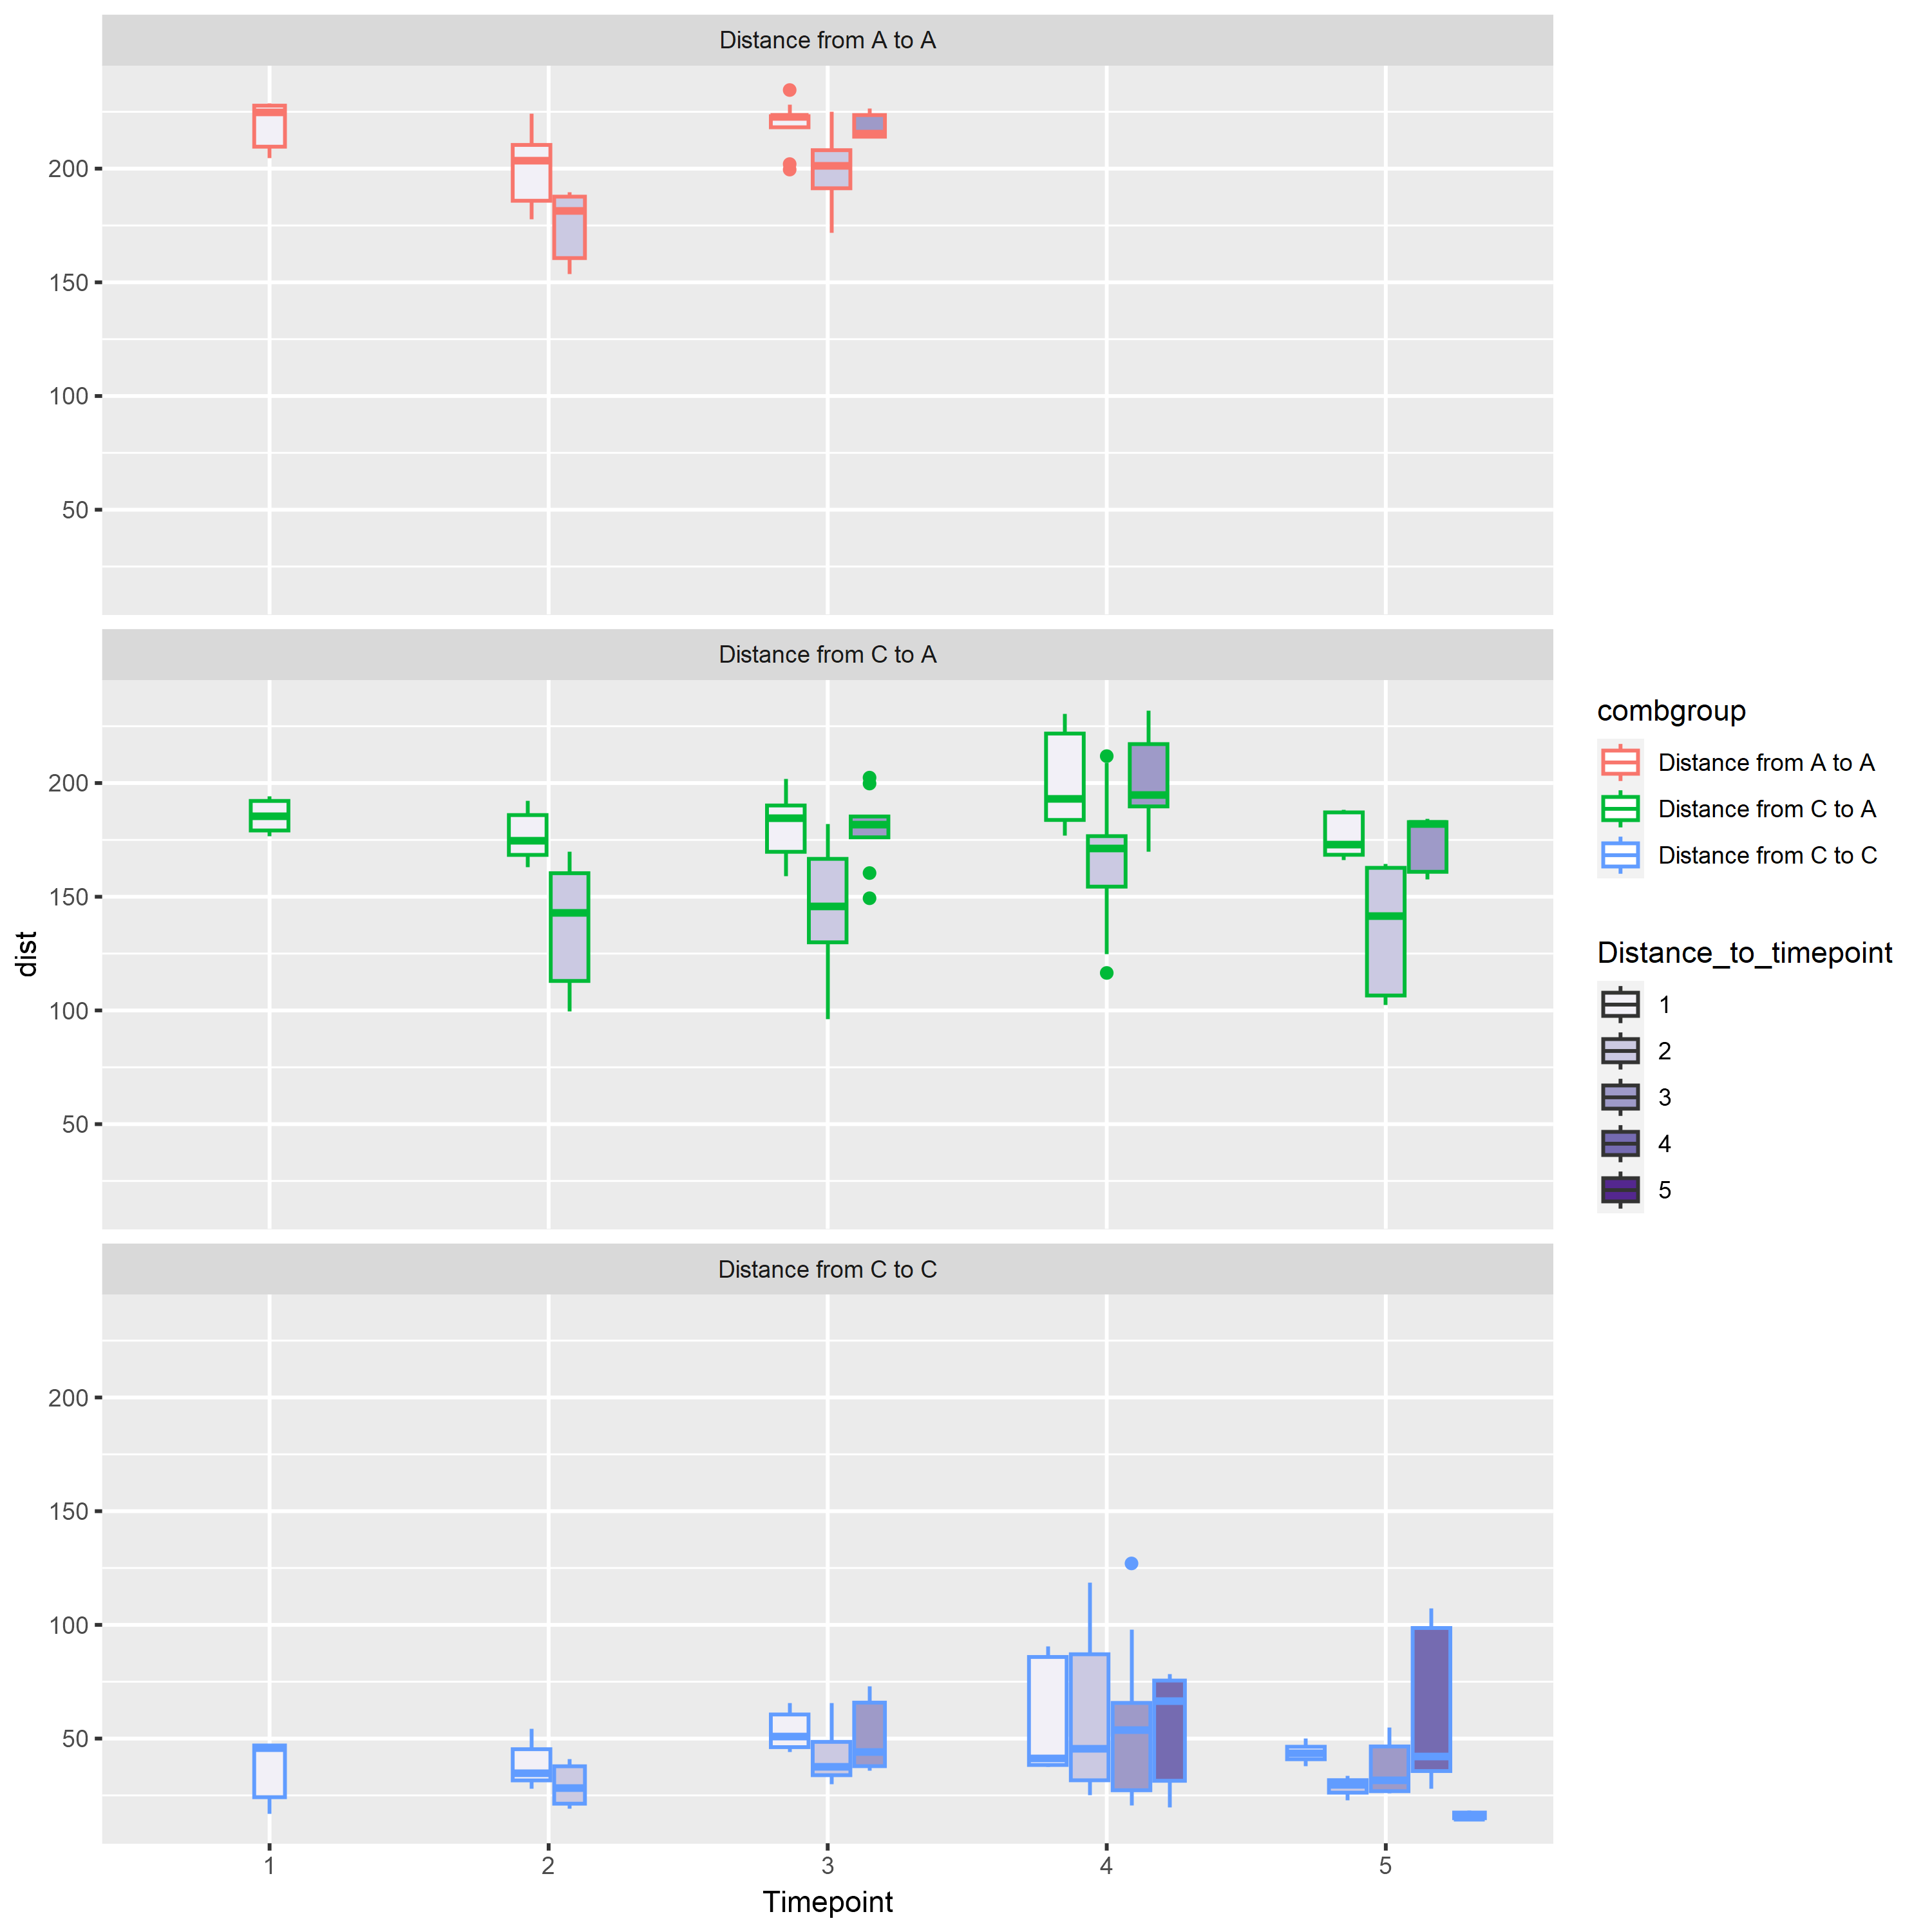

In [98]:
ggplot(mdist, aes(x=Timepoint, y=dist, fill=Distance_to_timepoint, 
                  color=combgroup)) +
   #geom_point() +
   #geom_line(aes(group=Timepoint_2))
   geom_boxplot(varwidth = TRUE) +
   scale_fill_manual(values = ann_colors$Timepoint) +
   facet_wrap(~combgroup, ncol=1)

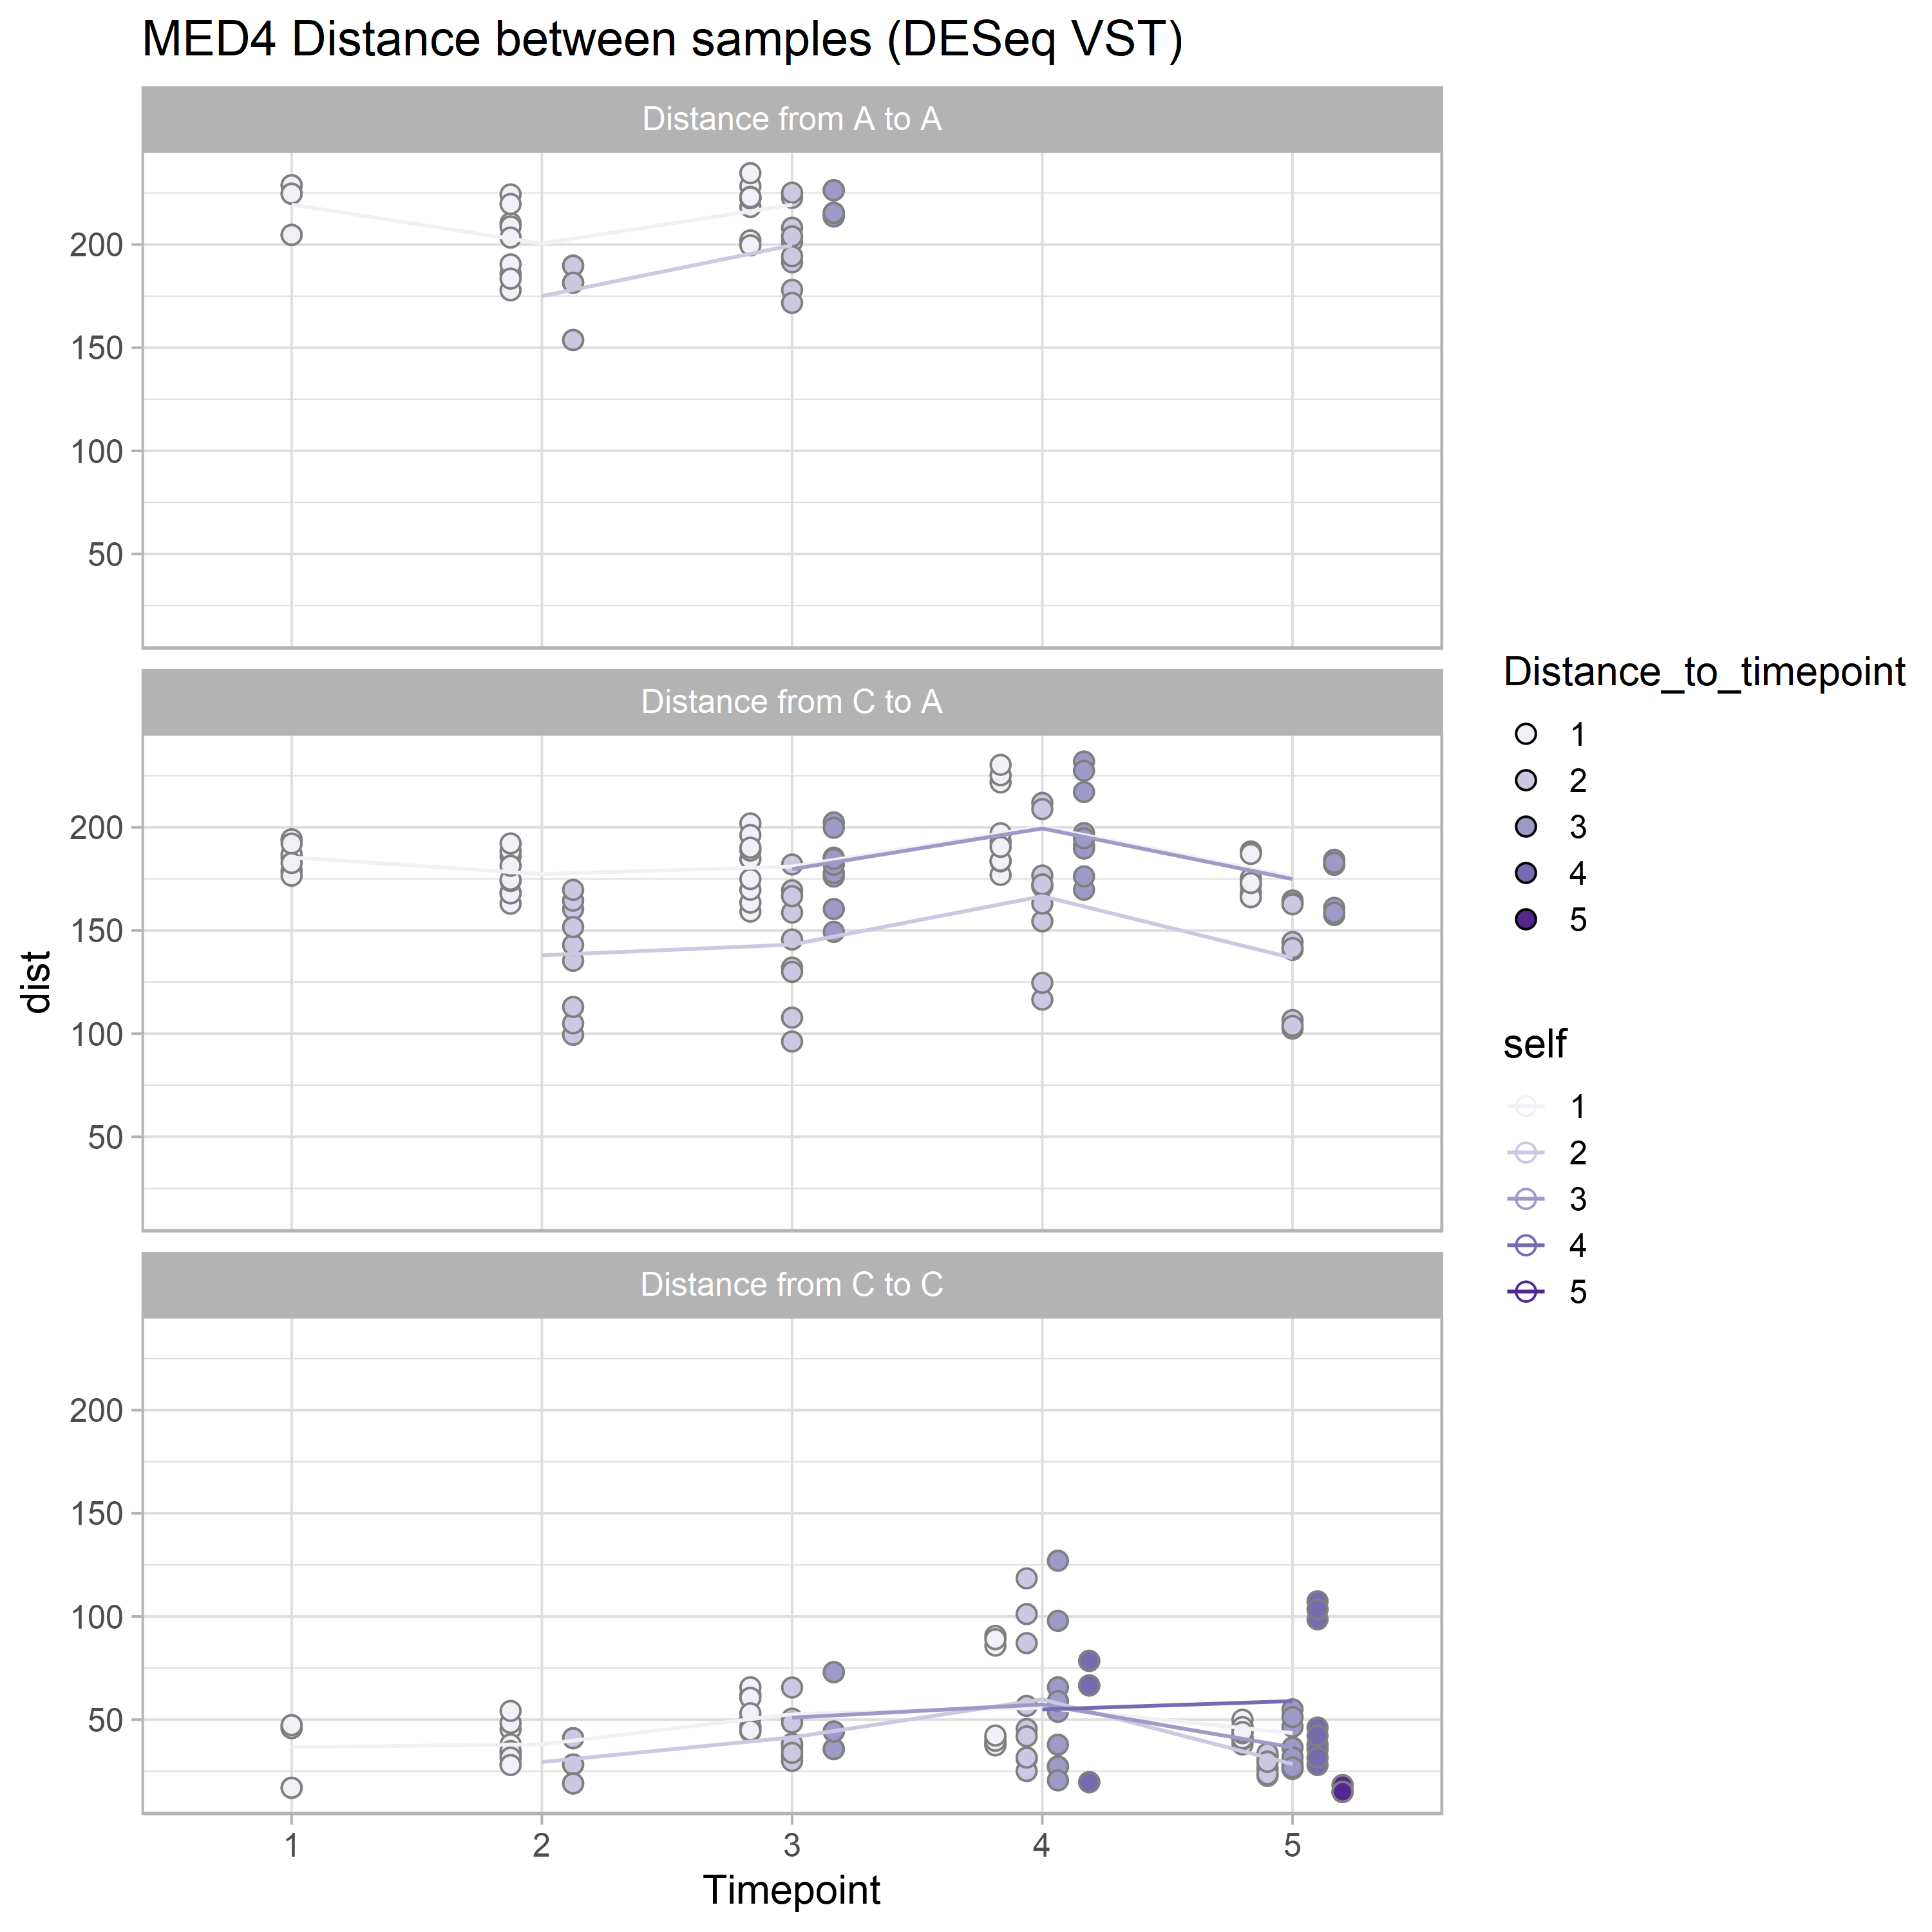

In [99]:
ggplot(mdist, aes(x=Timepoint, y=dist, fill=Distance_to_timepoint, 
                  color=self,
                  group=Distance_to_timepoint)) +
   geom_point(shape = 21, stroke = 0.5,
       position=position_dodge(width=0.5), #color='grey',
             size=3) +
   stat_summary(aes(color=Distance_to_timepoint), fun=mean, geom="line") +
   #geom_line(aes(group=Timepoint_2))
   #geom_boxplot(varwidth = TRUE) +
   scale_fill_manual(values = ann_colors$Timepoint) +
   scale_color_manual(values = ann_colors$Timepoint) +
   facet_wrap(~combgroup, ncol=1) +
  ggtitle("MED4 Distance between samples (DESeq VST)") +
  theme_light(base_size = 15)


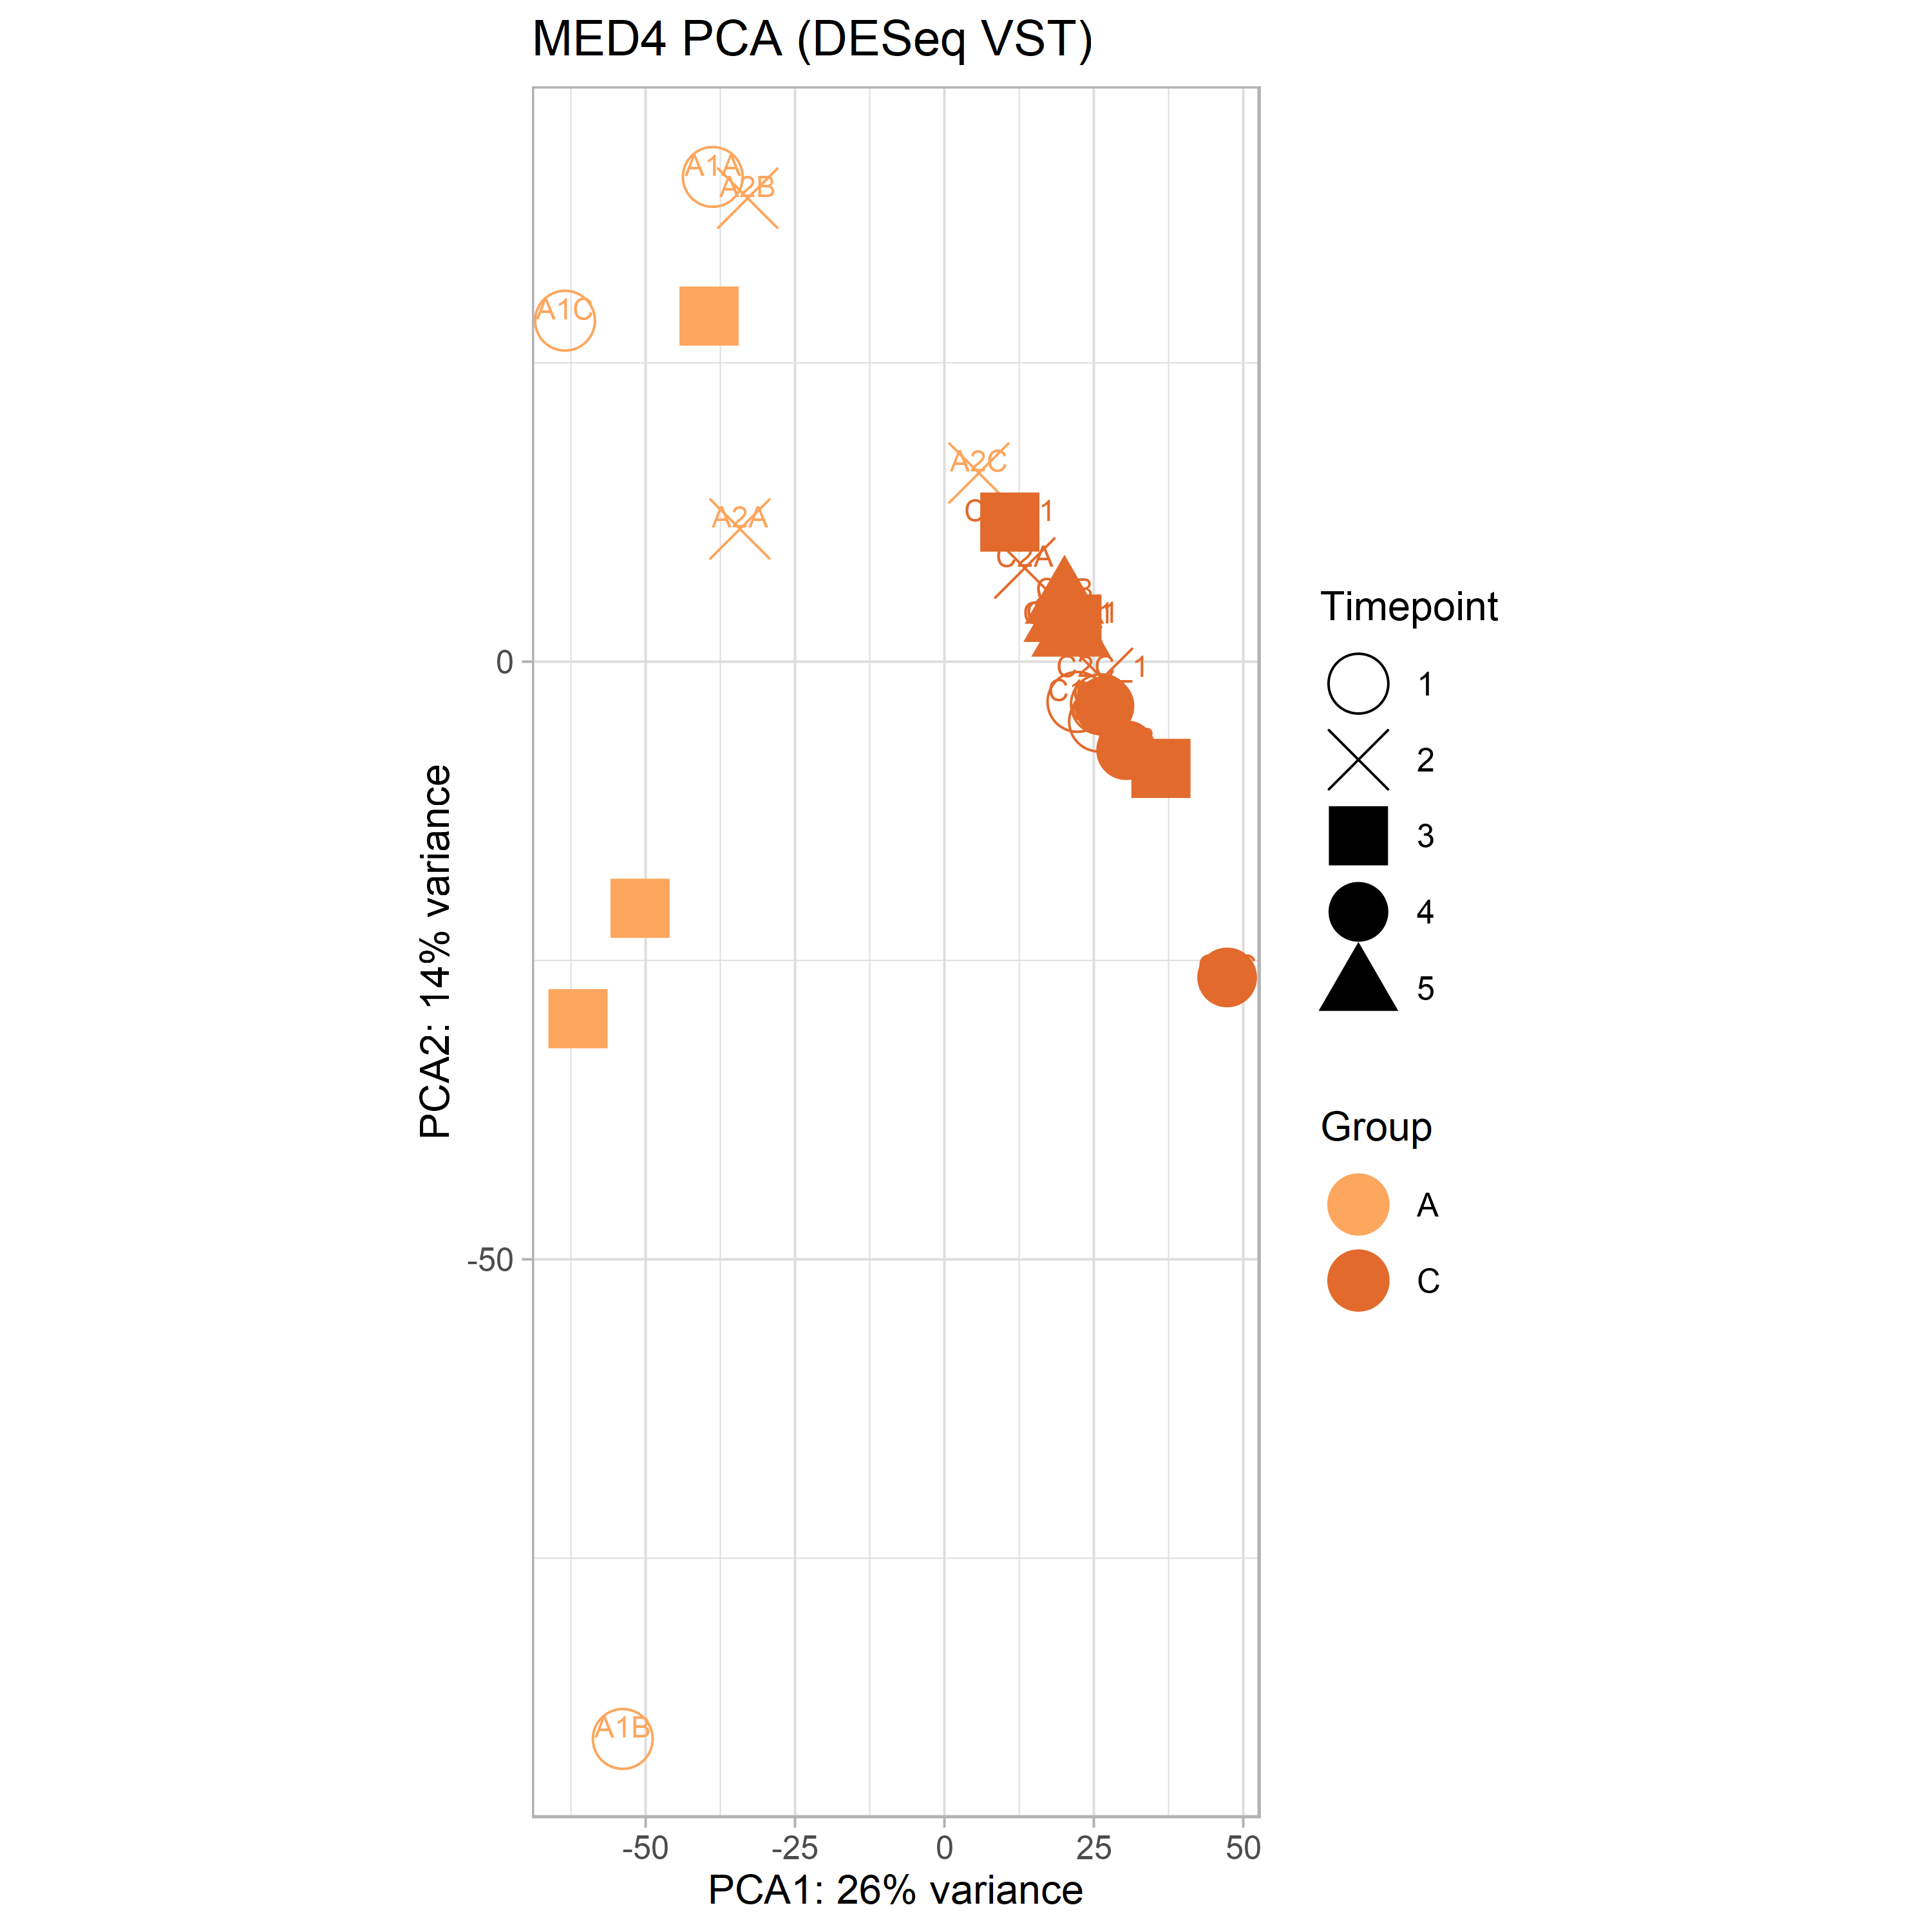

In [100]:
pcaData <- plotPCA(vsd, intgroup = c( "Timepoint", "Group", 'sample'), 
                   returnData = TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
gpal = brewer.pal(4, 'Dark2')

ggplot(pcaData, aes(x = PC1, y = PC2, 
                    color = Group, shape = Timepoint, label=sample)) +
  geom_point(size =10) +
  xlab(paste0("PCA1: ", percentVar[1], "% variance")) +
  ylab(paste0("PCA2: ", percentVar[2], "% variance")) +
  coord_fixed(ratio=2) +
  geom_text(nudge_y = 1) +
  scale_color_manual(values = ann_colors$Group) +
  scale_shape_manual(values=c(1, 4, 15, 16, 17))+
  ggtitle("MED4 PCA (DESeq VST)") +
  theme_light(base_size = 15)



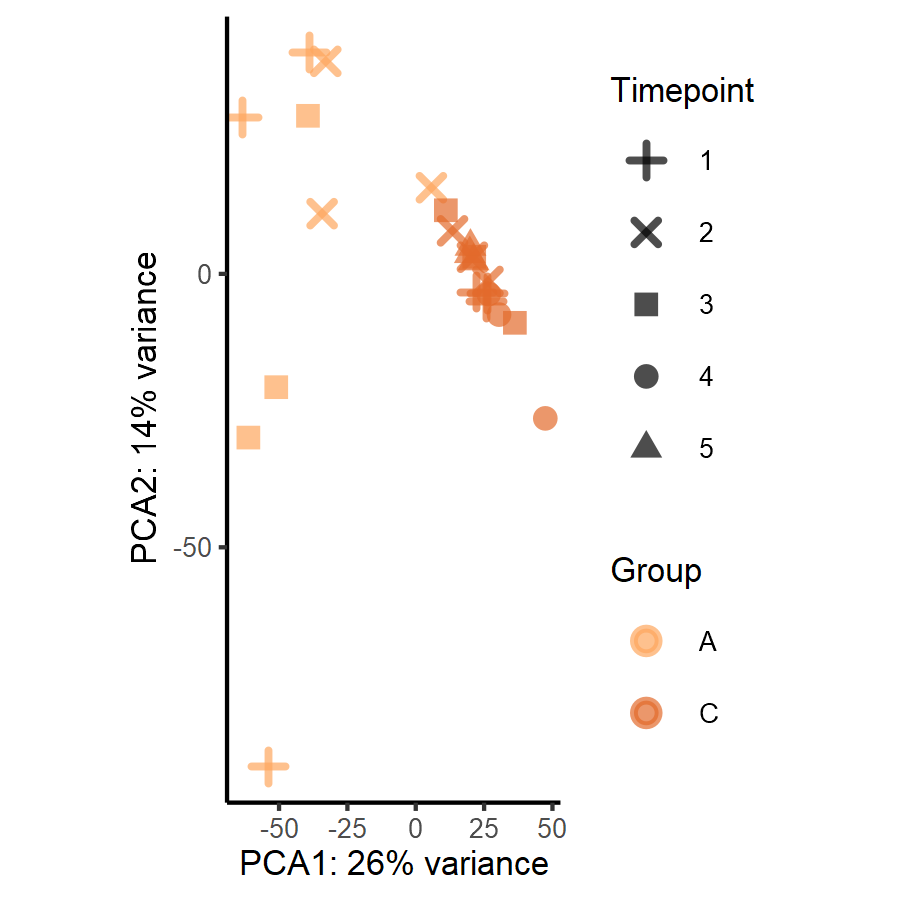

In [101]:
options(repr.plot.width = 3, repr.plot.height = 3, repr.plot.res = 300)
pcaData <- plotPCA(vsd, intgroup = c( "Timepoint", "Group", 'sample', 'treatment'), 
                   returnData = TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
gpal = brewer.pal(4, 'Dark2')

ggplot(pcaData, aes(x = PC1,  y = PC2, 
                    color = Group, shape = Timepoint, label=sample)) +
  geom_point(size =2, stroke = 1, alpha=0.7, position=position_jitter(h=0.1,w=0.1)) +
  xlab(paste0("PCA1: ", percentVar[1], "% variance")) +
  ylab(paste0("PCA2: ", percentVar[2], "% variance")) +
  coord_fixed(ratio=2) +
  #geom_text(nudge_y = 1) +
  scale_color_manual(values = ann_colors$Group) +
  scale_shape_manual(values=c(3,4, 15,16,17))+
  #ggtitle("1A3 PCA (DESeq VST)") +
  theme_classic(base_size = 8)  



In [102]:
assay(vsd)# [,c('C1', 'C2', 'C3', 'C4', 'C5')] #%>% select(starts_with('C')) # %>% rowSds() %>% hist()
#hist(rowSds(assay(vsd)))

,A1A,A1B,A1C,A2A,A2B,A2C,A3A,A3B,A3C,C1A,⋯,C2C_1,C3A_1,C3B,C3C_1,C4A,C4B,C4C,C5A,C5B,C5C
TX50_RS00020,0.3562145,0.3562145,0.3562145,7.4603408,0.3562145,5.5871625,0.3562145,0.3562145,0.3562145,5.575670,⋯,6.202432,4.254558,6.705863,5.766273,6.248485,6.279189,8.182468,5.781093,5.415953,5.3201246
TX50_RS00025,9.2607702,9.8761840,0.3562145,0.3562145,0.3562145,0.3562145,0.3562145,0.3562145,0.3562145,2.900483,⋯,2.886433,1.712298,2.847070,1.821922,2.784273,2.714651,4.323922,2.509577,1.878921,2.4570832
TX50_RS00030,0.3562145,10.8742196,10.6662690,9.0313218,7.6779304,5.5871625,10.5148058,0.3562145,11.4848506,4.083532,⋯,4.492062,3.768137,5.542657,4.692967,5.253516,5.339862,7.801845,4.532503,4.631636,4.7994326
TX50_RS00035,0.3562145,8.8801008,9.0858379,0.3562145,0.3562145,5.5871625,0.3562145,0.3562145,0.3562145,3.964720,⋯,3.955050,2.828391,4.647677,3.298051,4.314310,4.611522,6.299670,3.585642,3.352847,3.6618511
TX50_RS00040,0.3562145,11.8732359,0.3562145,8.4498737,8.4076995,0.3562145,11.5135438,10.2715384,0.3562145,4.739660,⋯,5.213185,3.449877,5.197470,4.169824,5.149310,5.309755,7.050544,4.476021,4.111316,4.3073074
TX50_RS00045,0.3562145,0.3562145,0.3562145,0.3562145,0.3562145,5.1967588,9.5173247,0.3562145,0.3562145,2.783053,⋯,2.812351,1.466004,3.651752,2.509929,3.248405,3.286955,4.118802,2.454722,2.148498,2.2980910
TX50_RS00050,0.3562145,0.3562145,0.3562145,7.4603408,0.3562145,0.3562145,0.3562145,7.4819291,0.3562145,2.970944,⋯,3.704503,2.867129,4.786363,4.009224,4.205903,4.642649,6.472143,3.304918,3.048894,3.3959859
TX50_RS00055,0.3562145,0.3562145,9.0858379,0.3562145,0.3562145,3.7895661,0.3562145,7.4819291,0.3562145,6.229396,⋯,6.560097,5.053554,7.439081,6.051828,6.443339,6.552257,8.706982,5.767288,5.445534,5.4389023
TX50_RS00060,0.3562145,0.3562145,0.3562145,9.7654666,0.3562145,0.3562145,0.3562145,0.3562145,10.1648528,3.149568,⋯,3.415420,2.403916,3.136955,2.647993,3.264729,2.661545,4.004015,2.789269,2.021393,2.7807541
TX50_RS00065,0.3562145,0.3562145,0.3562145,8.4498737,0.3562145,5.8940073,0.3562145,9.0531178,11.1632445,3.818529,⋯,2.971022,2.532769,4.115180,2.887421,3.700557,4.244682,6.071694,2.736025,3.011983,3.0674610


In [103]:
alpha=0.01

In [104]:
dds <- DESeq(dds)
res <- results(dds, alpha=alpha)
res

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



log2 fold change (MLE): treatment longterm vs A1 
Wald test p-value: treatment longterm vs A1 
DataFrame with 1855 rows and 6 columns
               baseMean log2FoldChange     lfcSE      stat      pvalue
              <numeric>      <numeric> <numeric> <numeric>   <numeric>
TX50_RS00020    54.4682       0.267544   1.42013  0.188394 8.50568e-01
TX50_RS00025    67.6453      -6.565371   1.05265 -6.236974 4.46117e-10
TX50_RS00030   380.9627      -4.192037   1.01971 -4.110991 3.93964e-05
TX50_RS00035    54.2511      -3.631021   1.26727 -2.865231 4.16705e-03
TX50_RS00040   378.7824      -4.859811   1.05275 -4.616300 3.90642e-06
...                 ...            ...       ...       ...         ...
TX50_RS09870   0.833014       -5.55281   1.73432  -3.20173 1.36606e-03
TX50_RS09875   1.644519       -4.84076   1.66341  -2.91015 3.61261e-03
TX50_RS09880   4.765865       -4.38380   1.39669  -3.13871 1.69693e-03
TX50_RS09885 100.812204       -6.83694   1.03598  -6.59951 4.12518e-11
TX50_RS09890  

In [105]:
s = summary(res)
s


out of 1855 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 5, 0.27%
LFC < 0 (down)     : 697, 38%
outliers [1]       : 127, 6.8%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



NULL

In [106]:
sum_dds <- function(name) {
    res = results(dds, contrast=name)
    sum = table(as.data.frame(res) %>% mutate(
           contrast = paste0(name[2],'vs', name[3]),
        na_pvalue = is.na(pvalue),
               na_padj = is.na(padj),
               significant = padj < 0.05,
               direction = if_else(log2FoldChange > 0, 'up', 'down'),
               status = if_else(na_pvalue, 'outlier',
                                if_else(na_padj, 'lowcount', 
                                        if_else(significant, direction, 'no_significant'
                                        
                               )))
               ) %>% select(status))
    #sum = cbind(sum, name=name)
    return(sum)
    }


In [107]:
get_dds <- function(name) {
    res = results(dds, contrast=name)
    res = as.data.frame(res) %>% 
       mutate(
           contrast = paste0(name[2],'vs', name[3]),
           na_pvalue = is.na(pvalue),
           na_padj = is.na(padj),
           significant = padj < 0.05,
           direction = if_else(log2FoldChange > 0, 'up', 'down'),
           status = if_else(na_pvalue, 'outlier',
                            if_else(na_padj, 'lowcount', 
                                    if_else(significant, direction, 'no_significant'
                                           )))
       ) 
    return(res)
}


In [108]:
results_names = resultsNames(dds)

dds$treatment = factor(dds$treatment, levels=c('A1', 'A2','A3','C1', 'C2', 'C3', 'longterm', 'NA'))

contrasts_to_check = list (
    c('treatment','longterm','A1'), 
    c('treatment','longterm','A2'), 
    c('treatment','longterm','A3'), 
    c('treatment','longterm','C1'), 
    c('treatment','longterm','C2'),
    c('treatment','longterm','C3')
)

contrasts_to_check

[[1]]
[1] "treatment" "longterm"  "A1"       

[[2]]
[1] "treatment" "longterm"  "A2"       

[[3]]
[1] "treatment" "longterm"  "A3"       

[[4]]
[1] "treatment" "longterm"  "C1"       

[[5]]
[1] "treatment" "longterm"  "C2"       

[[6]]
[1] "treatment" "longterm"  "C3"

In [109]:
#bind_rows(
sum_df = lapply(contrasts_to_check, sum_dds) %>% bind_rows 
sum_df$name= contrasts_to_check
sum_df


down,no_significant,outlier,up,name
<table[1d]>,<table[1d]>,<table[1d]>,<table[1d]>,<list>
983,734,127,11,treatmen....
271,1436,127,21,treatmen....
965,759,127,4,treatmen....
1,1708,127,19,treatmen....
NA,1713,127,15,treatmen....
NA,1728,127,NA,treatmen....


In [112]:
#bind_rows(
res_df = lapply(contrasts_to_check, get_dds) %>% 
  bind_rows %>%
  rownames_to_column(var = 'gene_id') 

write_csv(res_df, file.path('DE_results','HOT1A3_DE_DESEQ_longterm_results.csv'))


In [113]:
sum_df = sum_df %>% 
   filter(name != 'Intercept') %>% 
   mutate(tot_fc = up + down, 
         name = str_remove(name, 'treatment_'))

In [114]:
sum_df

down,no_significant,outlier,up,name,tot_fc
<table[1d]>,<table[1d]>,<table[1d]>,<table[1d]>,<chr>,<table[1d]>
983,734,127,11,"c(""treatment"", ""longterm"", ""A1"")",994
271,1436,127,21,"c(""treatment"", ""longterm"", ""A2"")",292
965,759,127,4,"c(""treatment"", ""longterm"", ""A3"")",969
1,1708,127,19,"c(""treatment"", ""longterm"", ""C1"")",20
NA,1713,127,15,"c(""treatment"", ""longterm"", ""C2"")",NA
NA,1728,127,NA,"c(""treatment"", ""longterm"", ""C3"")",NA


In [115]:
dds@design

~treatment

In [116]:
res_df

gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,na_pvalue,na_padj,significant,direction,status
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<lgl>,<chr>,<chr>
TX50_RS00020...1,54.468183,0.2675439,1.4201288,0.1883941,8.505677e-01,8.758130e-01,longtermvsA1,FALSE,FALSE,FALSE,up,no_significant
TX50_RS00025...2,67.645270,-6.5653714,1.0526534,-6.2369737,4.461169e-10,7.412405e-09,longtermvsA1,FALSE,FALSE,TRUE,down,down
TX50_RS00030...3,380.962746,-4.1920369,1.0197144,-4.1109911,3.939644e-05,2.114194e-04,longtermvsA1,FALSE,FALSE,TRUE,down,down
TX50_RS00035...4,54.251075,-3.6310213,1.2672700,-2.8652310,4.167052e-03,1.020745e-02,longtermvsA1,FALSE,FALSE,TRUE,down,down
TX50_RS00040...5,378.782377,-4.8598114,1.0527504,-4.6162998,3.906424e-06,2.800955e-05,longtermvsA1,FALSE,FALSE,TRUE,down,down
TX50_RS00045...6,35.370265,-3.6583164,1.4299609,-2.5583331,1.051753e-02,2.181787e-02,longtermvsA1,FALSE,FALSE,TRUE,down,down
TX50_RS00050...7,24.684125,-1.6896024,1.4968698,-1.1287570,2.590003e-01,3.245486e-01,longtermvsA1,FALSE,FALSE,FALSE,down,no_significant
TX50_RS00055...8,88.282207,-0.3385759,1.4416761,-0.2348488,8.143261e-01,8.441245e-01,longtermvsA1,FALSE,FALSE,FALSE,down,no_significant
TX50_RS00060...9,87.798992,-3.7204942,1.4857438,-2.5041290,1.227533e-02,2.451505e-02,longtermvsA1,FALSE,FALSE,TRUE,down,down
